In [2]:
#fisher score

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler

# Load dataset (PIMA Diabetes dataset can be used similarly)
diabetes = load_diabetes(as_frame=True)
df = diabetes.frame

# Separate features and target
X = df.drop(columns=['target'])  # Features
y = df['target']                # Labels

# Standardize features (important for Fisher Score)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute Fisher Score for each feature
def fisher_score(X, y):
    classes = np.unique(y)  # Get unique class labels
    scores = []
    
    for i in range(X.shape[1]):  # Loop over features
        overall_mean = np.mean(X[:, i])  # Mean of feature across all data
        numerator, denominator = 0, 0
        
        for c in classes:
            class_samples = X[y == c, i]  # Get samples for class c
            class_mean = np.mean(class_samples)
            class_var = np.var(class_samples)
            class_count = len(class_samples)
            
            numerator += class_count * (class_mean - overall_mean) ** 2
            denominator += class_count * class_var
        
        score = numerator / (denominator + 1e-6)  # Avoid division by zero
        scores.append(score)
    
    return np.array(scores)

# Compute Fisher Scores
fisher_scores = fisher_score(X_scaled, y)

# Rank features by Fisher Score
feature_ranks = np.argsort(fisher_scores)[::-1]  # Sort in descending order

# Display feature rankings
feature_names = X.columns
print("Feature Ranking based on Fisher Score:")
for rank, index in enumerate(feature_ranks):
    print(f"{rank+1}. {feature_names[index]} - Score: {fisher_scores[index]:.4f}")


Feature Ranking based on Fisher Score:
1. s5 - Score: 1.9188
2. bmi - Score: 1.8980
3. s3 - Score: 1.5132
4. bp - Score: 1.4514
5. s4 - Score: 1.4356
6. s6 - Score: 1.1100
7. age - Score: 1.0166
8. sex - Score: 1.0065
9. s1 - Score: 0.8609
10. s2 - Score: 0.8321


In [4]:
# froward selection

In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler

# Load Diabetes Dataset
diabetes = load_diabetes(as_frame=True)
df = diabetes.frame

# Separate features and target variable
X = df.drop(columns=['target'])  # Features
y = df['target']  # Target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize model (Linear Regression)
model = LinearRegression()

# Perform Forward Selection using SequentialFeatureSelector
sfs = SequentialFeatureSelector(model, direction='forward', n_features_to_select=5, cv=5)  # Selecting top 5 features
sfs.fit(X_train, y_train)

# Get selected feature indices and names
selected_features = np.array(X.columns)[sfs.get_support()]

# Print the selected features
print("Selected Features:", selected_features)


Selected Features: ['sex' 'bmi' 'bp' 's3' 's5']


In [6]:
#backward elemention

In [7]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler

# Load Diabetes Dataset
diabetes = load_diabetes(as_frame=True)
df = diabetes.frame

# Separate features and target
X = df.drop(columns=['target'])  # Features
y = df['target']  # Target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add intercept for OLS regression
X_scaled = sm.add_constant(X_scaled)  # Adds a bias term (constant) to the model

# Convert to DataFrame for column tracking
X_df = pd.DataFrame(X_scaled, columns=['Intercept'] + list(X.columns))

# Perform Backward Elimination
def backward_elimination(X, y, significance_level=0.05):
    X_selected = X.copy()
    while True:
        model = sm.OLS(y, X_selected).fit()  # Fit OLS regression
        p_values = model.pvalues  # Get p-values
        max_p_value = p_values.max()  # Find the highest p-value
        if max_p_value > significance_level:
            worst_feature = p_values.idxmax()  # Get feature with highest p-value
            print(f"Removing '{worst_feature}' (p-value: {max_p_value:.4f})")
            X_selected = X_selected.drop(columns=[worst_feature])  # Remove feature
        else:
            break  # Stop when all p-values are below significance level
    return X_selected, model

# Apply Backward Elimination
X_selected, final_model = backward_elimination(X_df, y)

# Show final selected features
print("\nFinal Selected Features:", list(X_selected.columns))


Removing 'age' (p-value: 0.8670)
Removing 's3' (p-value: 0.6386)
Removing 's6' (p-value: 0.3040)
Removing 's4' (p-value: 0.2619)

Final Selected Features: ['Intercept', 'sex', 'bmi', 'bp', 's1', 's2', 's5']


In [8]:
# Exesitive

In [10]:
!pip install mlxtend


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.4 MB 1.3 MB/s eta 0:00:01
   --------------- ------------------------ 0.5/1.4 MB 4.7 MB/s eta 0:00:01
   ---------------------------------------  1.3/1.4 MB 8.5 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 7.8 MB/s eta 0:00:00


In [11]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.preprocessing import StandardScaler

# Load Diabetes Dataset
diabetes = load_diabetes(as_frame=True)
df = diabetes.frame

# Separate features and target
X = df.drop(columns=['target'])  # Features
y = df['target']  # Target variable

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize model (Linear Regression)
model = LinearRegression()

# Perform Exhaustive Feature Selection
efs = ExhaustiveFeatureSelector(
    model,
    min_features=1,
    max_features=5,  # Can adjust based on computational power
    scoring='r2',  # Optimize based on R² score
    cv=5  # 5-fold cross-validation
)

efs.fit(X_train, y_train)

# Get best feature subset
best_features = list(X.columns[list(efs.best_idx_)])
print("Best Feature Subset:", best_features)


Features: 637/637

Best Feature Subset: ['sex', 'bmi', 'bp', 's3', 's5']


In [13]:
#recusive

In [14]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

# Load Diabetes Dataset
diabetes = load_diabetes(as_frame=True)
df = diabetes.frame

# Separate features and target
X = df.drop(columns=['target'])  # Features
y = df['target']  # Target variable

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize model (Linear Regression)
model = LinearRegression()

# Perform Recursive Feature Elimination (RFE)
rfe = RFE(estimator=model, n_features_to_select=5)  # Select top 5 features
rfe.fit(X_train, y_train)

# Get selected feature names
selected_features = np.array(X.columns)[rfe.support_]

print("Selected Features:", selected_features)


Selected Features: ['bmi' 'bp' 's1' 's2' 's5']


In [16]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load Diabetes Dataset
diabetes = load_diabetes(as_frame=True)
df = diabetes.frame

# Separate features and target
X = df.drop(columns=['target'])  # Features
y = df['target']  # Target variable

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize Lasso model with regularization parameter alpha
lasso = Lasso(alpha=0.1)  # alpha controls the strength of regularization

# Fit the model
lasso.fit(X_train, y_train)

# Predictions
y_pred = lasso.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# Display coefficients
print("\nLasso Coefficients:")
for feature, coef in zip(X.columns, lasso.coef_):
    print(f"{feature}: {coef:.4f}")

# Show the selected features (coefficients are non-zero)
selected_features = X.columns[lasso.coef_ != 0]
print("\nSelected Features with Non-zero Coefficients:", selected_features)


Mean Squared Error: 2884.5531

Lasso Coefficients:
age: 1.7749
sex: -11.3143
bmi: 26.0171
bp: 16.3601
s1: -29.2650
s2: 13.2787
s3: 0.5514
s4: 10.1988
s5: 29.5129
s6: 2.3587

Selected Features with Non-zero Coefficients: Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')


Mean Squared Error: 2963.0138

Feature Importance (Random Forest):
  Feature  Importance
2     bmi    0.355469
8      s5    0.230957
3      bp    0.088408
9      s6    0.071329
0     age    0.058642
5      s2    0.057227
4      s1    0.052784
6      s3    0.051339
7      s4    0.024213
1     sex    0.009633


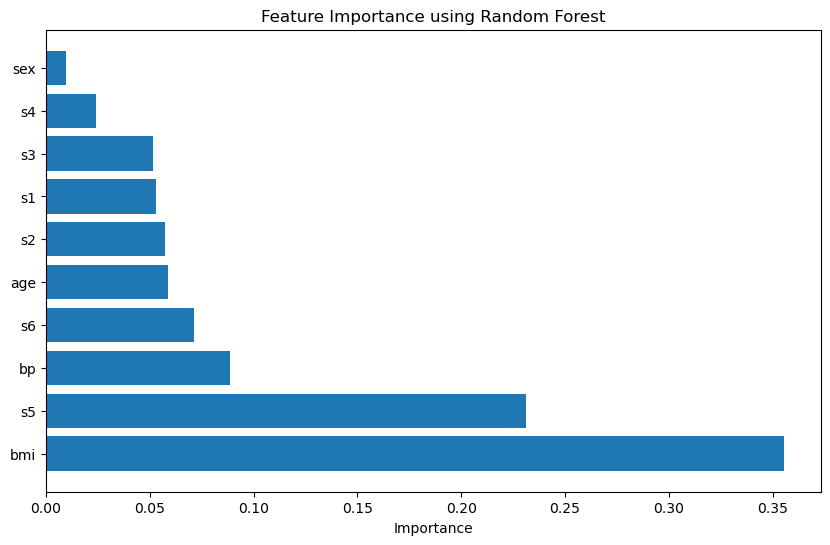

In [17]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load Diabetes Dataset
diabetes = load_diabetes(as_frame=True)
df = diabetes.frame

# Separate features and target
X = df.drop(columns=['target'])  # Features
y = df['target']  # Target variable

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# Feature Importance
feature_importance = rf.feature_importances_

# Create a DataFrame to view feature importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance
print("\nFeature Importance (Random Forest):")
print(importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance using Random Forest')
plt.show()
